In [59]:
# importing some basic libraries
import csv
import pandas as pd
import random


%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn import metrics


# DataSet Loading & shuffling

In [322]:
df = pd.read_csv("heart.csv")
# print(df.head())

#drop some features
# df = df.drop(columns = ['cp', 'thal', 'slope','sex','fbs','restecg','exang','ca','oldpeak','age','trestbps'])
 
no_samples , no_features  = df.to_numpy().shape
samples  = df.to_numpy()
samplesindices = []
for e in range(no_samples):
    samplesindices.append(e)
    
random.shuffle(samplesindices) 
# print(samples.shape)
ShuffeledSamples =samples
counter = 0
y_data = samples
for i in range(13):
    y_data = np.delete(y_data, 0,1) 



for e in samplesindices:
    
    if samples[e][13] == 0:
        y_data[counter] = -1
    else:
        y_data[counter] = 1
            
    ShuffeledSamples[counter]=samples[e]
    counter +=1
# print(ShuffeledSamples.shape)
samples = ShuffeledSamples
x_data = np.delete(samples, 13,1)  
 


# DataSet  splitting & preparing

In [323]:
test_size_present = 0.2 
testing_size = int(x_data.shape[0] * test_size_present)
testCaseNo =2 # from 0 to 4 for 5 experiments for each shufffle 



testing_start_index = testing_size*int(testCaseNo)


x_test = x_data[testing_start_index:testing_start_index+testing_size] 
y_test = y_data[testing_start_index:testing_start_index+testing_size]



if testing_start_index == 0 :         
   
    x_train = x_data[testing_start_index+testing_size:]   
    y_train = y_data[testing_start_index+testing_size:] 
    
elif testing_start_index+testing_size == x_data.shape[0]: 
    
    x_train = x_data[:testing_start_index]   
    y_train = y_data[:testing_start_index] 
    
else : 
    x_train = x_data[:testing_start_index]   
    y_train = y_data[:testing_start_index] 
    
    x_train=np.append(x_train,x_data[testing_start_index+testing_size:], axis = 0) 
    y_train =np.append(y_train,y_data[testing_start_index+testing_size:], axis = 0) 

print(testing_size) 
print(testing_start_index)
# x_train = x_train.T
# print(x_train)
# y_train = y_train.T
# x_test = x_test.T
# y_test = y_test.T 

60
120


# LogisticRegression

In [324]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_acc = lr.score(x_test,y_test)*100
 
print("LogisticRegression Test Accuracy {:.2f}%".format(lr_acc))

LogisticRegression Test Accuracy 86.67%


C:\Users\engah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\engah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Support Vector Machine #1

In [326]:
from sklearn.svm import SVC

polysvm = SVC(kernel='poly', degree=1,gamma='auto') 
polysvm.fit(x_train, y_train)  
print('b = ',polysvm.intercept_) 

polysvm_acc = polysvm.score(x_test,y_test)*100 
print("poly SVC Test Accuracy : {:.2f}%".format(polysvm_acc))

# svm = SVC(random_state = 1,gamma='auto') 
# svm.fit(x_train.T, y_train.T) 
# acc = svm.score(x_test.T,y_test.T)*100 
# print("line Test Accuracy : {:.2f}%".format(acc))

# svm = SVC(kernel='rbf',gamma='auto') 
# svm.fit(x_train.T, y_train.T) 
# acc = svm.score(x_test.T,y_test.T)*100 
# print("rbf Test Accuracy : {:.2f}%".format(acc))


# svm = SVC(kernel='sigmoid',gamma='auto')
# svm.fit(x_train.T, y_train.T)
# acc = svm.score(x_test.T,y_test.T)*100 
# print("sigmoid Test Accuracy : {:.2f}%".format(acc))




b =  [2.80585133]
poly SVC Test Accuracy : 85.00%


C:\Users\engah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Support Vector Machine #2

In [327]:
from __future__ import division, print_function
import numpy as np
import cvxopt
# from mlfromscratch.utils import train_test_split, normalize, accuracy_score
# from mlfromscratch.utils.kernels import *
# from mlfromscratch.utils import Plot

# Hide cvxopt output
cvxopt.solvers.options['show_progress'] = False

def polynomial_kernel(power, coef, **kwargs):
        def f(x1, x2):
            return (np.inner(x1, x2) + coef)**power
        return f

class SupportVectorMachine(object):
    
    def __init__(self, C=1, kernel=polynomial_kernel, power=1, gamma=False, coef=0):
        self.C = C
        self.kernel = kernel
        self.power = power
        self.gamma = gamma
        self.coef = coef
        self.lagr_multipliers = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.intercept = None

    def fit(self, X, y):
        
        n_samples, n_features = np.shape(X)
        
        # Set gamma to 1/n_features by default
        if not self.gamma:
            self.gamma = 1 / n_features
        
        # Initialize kernel method with parameters
        self.kernel = self.kernel(
            power=self.power,
            gamma=self.gamma,
            coef=self.coef)
                
        # Calculate kernel matrix
        kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.kernel(X[i], X[j])

        # Define the quadratic optimization problem
        P = cvxopt.matrix(np.outer(y, y) * kernel_matrix, tc='d')
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples), tc='d')
        b = cvxopt.matrix(0, tc='d')
        
        
        if not self.C:
            G = cvxopt.matrix(np.identity(n_samples) * -1)
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G_max = np.identity(n_samples) * -1
            G_min = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((G_max, G_min)))
            h_max = cvxopt.matrix(np.zeros(n_samples))
            h_min = cvxopt.matrix(np.ones(n_samples) * self.C)
            h = cvxopt.matrix(np.vstack((h_max, h_min)))  
        # Solve the quadratic optimization problem using cvxopt
        minimization = cvxopt.solvers.qp(P, q, G, h, A, b)
#         print(minimization['x'])
        # Lagrange multipliers
        lagr_mult = np.ravel(minimization['x'])
#         print(lagr_mult)
        # Extract support vectors
        # Get indexes of non-zero lagr. multipiers
        idx = lagr_mult > 1e-13
        
#         print(idx)
        
        # Get the corresponding lagr. multipliers
        self.lagr_multipliers = lagr_mult[idx]
        # Get the samples that will act as support vectors
        self.support_vectors = X[idx]
        # Get the corresponding labels
        self.support_vector_labels = y[idx]
        
#         print(self.support_vectors)
#         print(self.support_vector_labels)

        # Calculate intercept with first support vector
        self.intercept = self.support_vector_labels[0]
        for i in range(len(self.lagr_multipliers)):
            self.intercept -= self.lagr_multipliers[i] * self.support_vector_labels[
                i] * self.kernel(self.support_vectors[i], self.support_vectors[0])

    def predict(self, X):
        y_pred = []
        # Iterate through list of samples and make predictions
        for sample in X:
            prediction = 0
            # Determine the label of the sample by the support vectors
            for i in range(len(self.lagr_multipliers)):
                prediction += self.lagr_multipliers[i] * self.support_vector_labels[
                    i] * self.kernel(self.support_vectors[i], sample)
            prediction += self.intercept
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)

UnitTest


In [232]:
polysvm_from_sc = SupportVectorMachine() 
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([-1, -1, 1, 1]) 
polysvm_from_sc.fit(X, y)
print(int(polysvm_from_sc.predict([[-0.8, -1]])))
print(int(polysvm_from_sc.predict([[2, 1]])))

-1
1


In [328]:
polysvm_from_sc = SupportVectorMachine() 
polysvm_from_sc.fit(x_train , y_train) 
 
#testing
prediected= polysvm_from_sc.predict(x_test)

# print(prediected)
res = confusion_matrix(y_test, prediected,[1,-1])
polysvm_from_sc_acc = metrics.accuracy_score(y_test, prediected)*100 
 
print("# Support Vector Machine #2 Test Accuracy {:.2f}%".format((polysvm_from_sc_acc)))

# Support Vector Machine #2 Test Accuracy 31.67%


# DecisionTree

In [329]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

dtc_acc = dtc.score(x_test, y_test)*100 
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_acc))

Decision Tree Test Accuracy 93.33%


# KNN

In [330]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# sc_X = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.transform(x_test)

knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(x_train,y_train)

y_pred = knnclassifier.predict(x_test)
#check accuracy
knnclassifier_acc = metrics.accuracy_score(y_test, y_pred)*100
print('knn classifier Accuracy: {:.2f}'.format(knnclassifier_acc))

knn classifier Accuracy: 78.33


C:\Users\engah\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


# mixed_naive_bayes

In [331]:
from mixed_naive_bayes import MixedNB
modelMixedNB = MixedNB(categorical_features=[1,2,5,6,8,10,11,12]) #index of categories and discrete columns 
y_temp = []
for e in y_train :
    if  e[0] == -1 :
        newlabel = 0 
    else :
        newlabel = 1
    y_temp.append(newlabel)
modelMixedNB.fit(x_train,y_temp)
# making predictions on the training set 
y_pred = modelMixedNB.predict(x_test) 

y_test_new_label = []
for e in y_test :
    if  e[0] == -1 :
        newlabel = 0 
    else :
        newlabel = 1
    y_test_new_label.append(newlabel)
modelMixedNB_acc = metrics.accuracy_score(y_test_new_label, y_pred)*100   
print("Mixed Naive Bayes model accuracy:", modelMixedNB_acc)
# plt.figure(figsize=(8,8))
# cm=confusion_matrix(y_train,y_pred_train)
# sns.heatmap(cm,annot=True,cmap="Blues")
# plt.title("confusion matrix train data")
# plt.show()
# # making predictions on the testing set 
# y_pred_test = model.predict(X_test) 
# # comparing actual response values (y_test) with predicted response values (y_pred) 
# print("Mixed Naive Bayes model test accuracy:", accuracy_score(y_test, y_pred_test)*100,"%")
# plt.figure(figsize=(8,8))
# cm=confusion_matrix(y_test,y_pred_test)
# sns.heatmap(cm,annot=True,cmap="Blues")
# plt.title("confusion matrix test data")
# plt.show()

[2 4 2 3 2 3 5 4]
Mixed Naive Bayes model accuracy: 78.33333333333333


# Testing and composing the results

2
LogisticRegression Test Accuracy 86.67%
Decision Tree Test Accuracy 93.33%
poly SVC Test Accuracy : 85.00%
# Support Vector Machine #2 Test Accuracy 31.67%
knn classifier Accuracy: 78.33
Mixed Naive Bayes model accuracy: 78.33333333333333
---------------
Total Accuracy :85.24590163934425


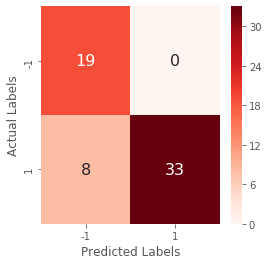

In [332]:
print(testCaseNo)
print("LogisticRegression Test Accuracy {:.2f}%".format(lr_acc))
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_acc))
print("poly SVC Test Accuracy : {:.2f}%".format(polysvm_acc))
print("# Support Vector Machine #2 Test Accuracy {:.2f}%".format((polysvm_from_sc_acc)))
print('knn classifier Accuracy: {:.2f}'.format(knnclassifier_acc))
print("Mixed Naive Bayes model accuracy:", modelMixedNB_acc)
prediected = []
result={1 : 0 , -1 : 0}

for test in x_test :   
    result[dtc.predict([test])[0]] +=1 
    result[polysvm.predict([test])[0]] +=1
    result[lr.predict([test])[0]] +=1     
    result[int(polysvm_from_sc.predict([test])[0])] +=1
    result[int(knnclassifier.predict([test])[0])] +=1
    
    modelMixedNBres =  int(modelMixedNB.predict([test])[0])
    if modelMixedNBres == 0 :
        modelMixedNBres = -1 
    result[modelMixedNBres] +=1 
    
    if  result[-1] >= result[1] :
        prediected.append(-1)
    else:
        prediected.append(1)
        
    result={1 : 0 , -1 : 0}  
    
labels=[1,-1]    
data = confusion_matrix(y_test, prediected,labels)
# print(data)
# print(y_test.T)
# print(prediected) 
print("---------------"  )
print("Total Accuracy :" + str((data[0][0]+data[1][1])/61*100) )
df_cm = pd.DataFrame(data, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'Actual Labels';
df_cm.columns.name = 'Predicted Labels';
plt.figure(figsize = (4,4));
 
plot = sn.heatmap(df_cm, cmap="Reds", annot=True, annot_kws={"size": 16});
plot_img = plot.get_figure();


# Final Results

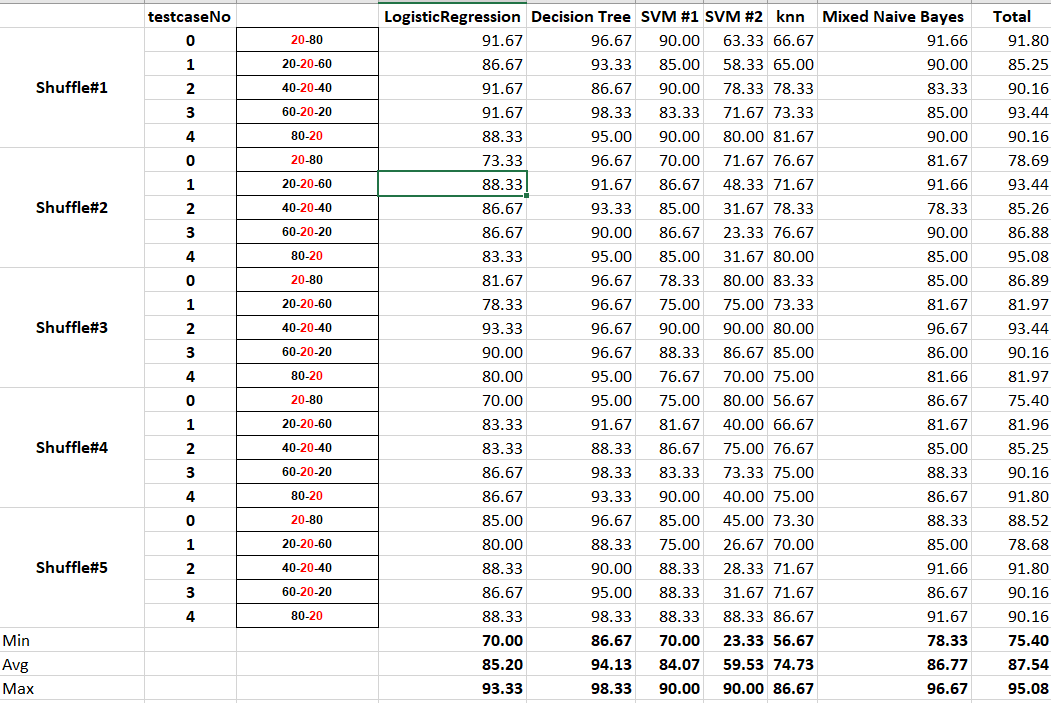